# RounD Trajectory Data Analysis

## Brief Introduction to RounD

RounD is a dataset collected by Aachen University, German. This dataset "contains a total of six hours of recordings with more than 13,746 road users including cars, vans, trucks, buses, pedestrians, bicycles and motorcycles" from three roundabouts.

This repository provides a data sample including less than 5% of the original dataset. It also provides a visualized insight into the dataset. For those interested in accessing the complete dataset, please follow this [link](https://www.round-dataset.com/).

### Trajectory Types in InD

In rounD, trajectories falls into these following categories:

- `bicycle`
- `bus`
- `car`
- `motorcycle`
- `pedestrian`
- `trailer`
- `truck`
- `van`

### Match Trajectory Data with Maps

According to meta records:

- Trajectory data files 00 are recorded in location 1 (denoted as rounD_1)
- Trajectory data files 01 are recorded in location 2 (denoted as rounD_2)
- Trajectory data files 03-23 are recorded in location 0 (denoted as rounD_0). Among them, files 03-08 are recorded in region 0 and files 09-23 are recorded in region 1.

In [1]:
import sys

sys.path.append(".")

import warnings

warnings.filterwarnings("ignore")

import json

import matplotlib.transforms as mtransforms

from utils import levelx

with open("../map/map.config", "r") as f:
    configs = json.load(f)

data_path = "../trajectory/rounD/data"
img_path = "../img/rounD"
trajectory_types = ["car", "truck", "trailer", "bus", "van", "motorcycle", "bicycle", "pedestrian"]

## Data Analysis

The data analysis will first present visualizations of both the map and trajectory data and then analysis the speed distribution and lane changing frequency of vehicles, categorized by their types.

### Map and Trajectory Visualization

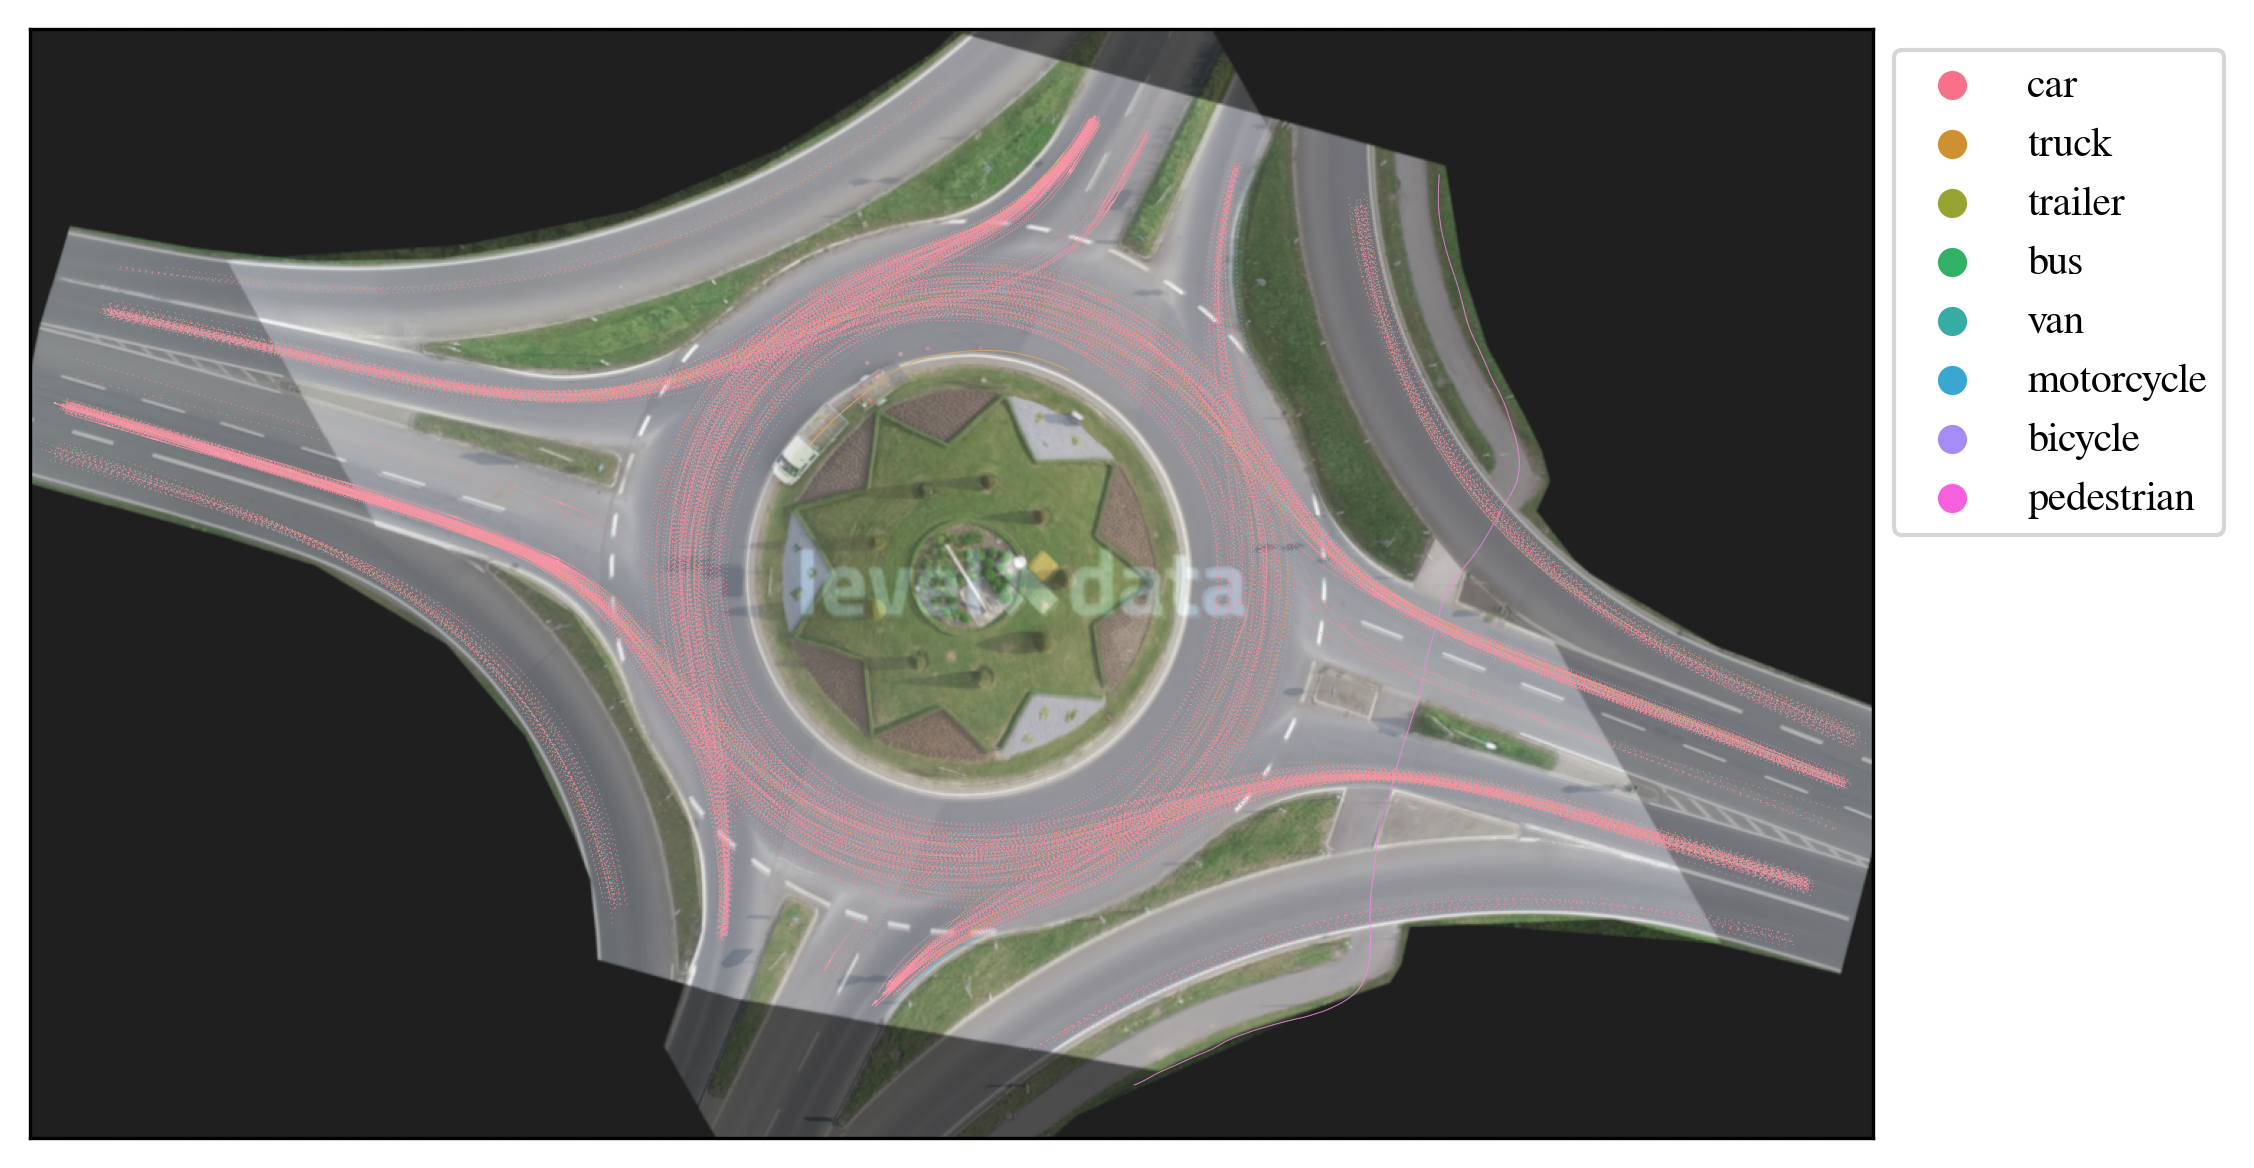

In [2]:
transform0 = mtransforms.Affine2D().scale(0.1).translate(0.5, -95)
levelx.plot_map_and_trajectories(
    "rounD_0", data_path, img_path, transform0, trajectory_types, configs
)

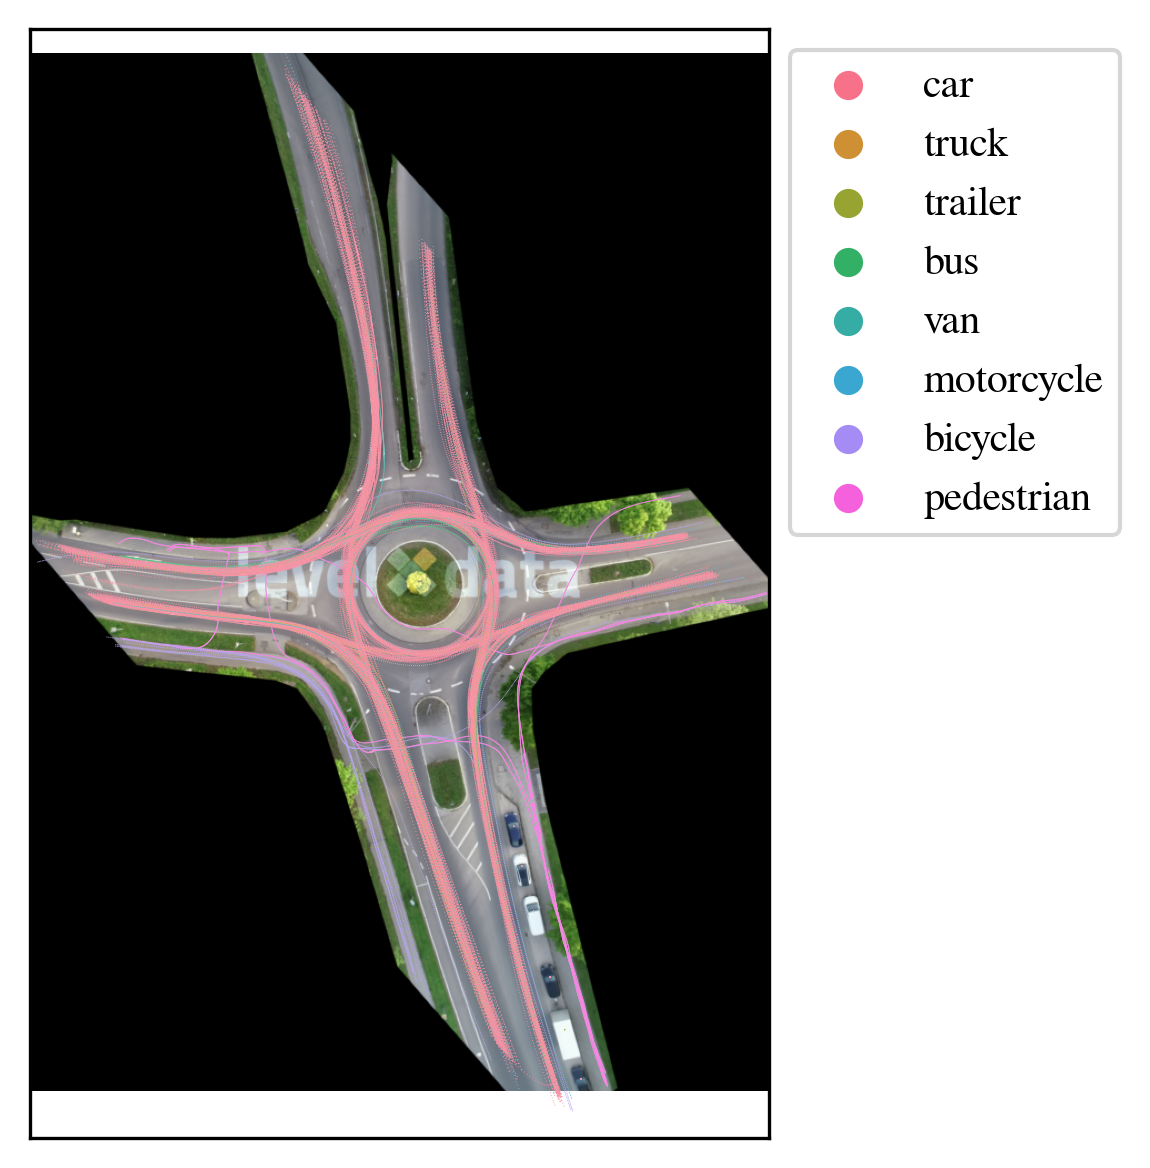

In [3]:
transform1 = mtransforms.Affine2D().scale(0.15).translate(-1.5, -139.5)
levelx.plot_map_and_trajectories(
    "rounD_1", data_path, img_path, transform1, trajectory_types, configs
)

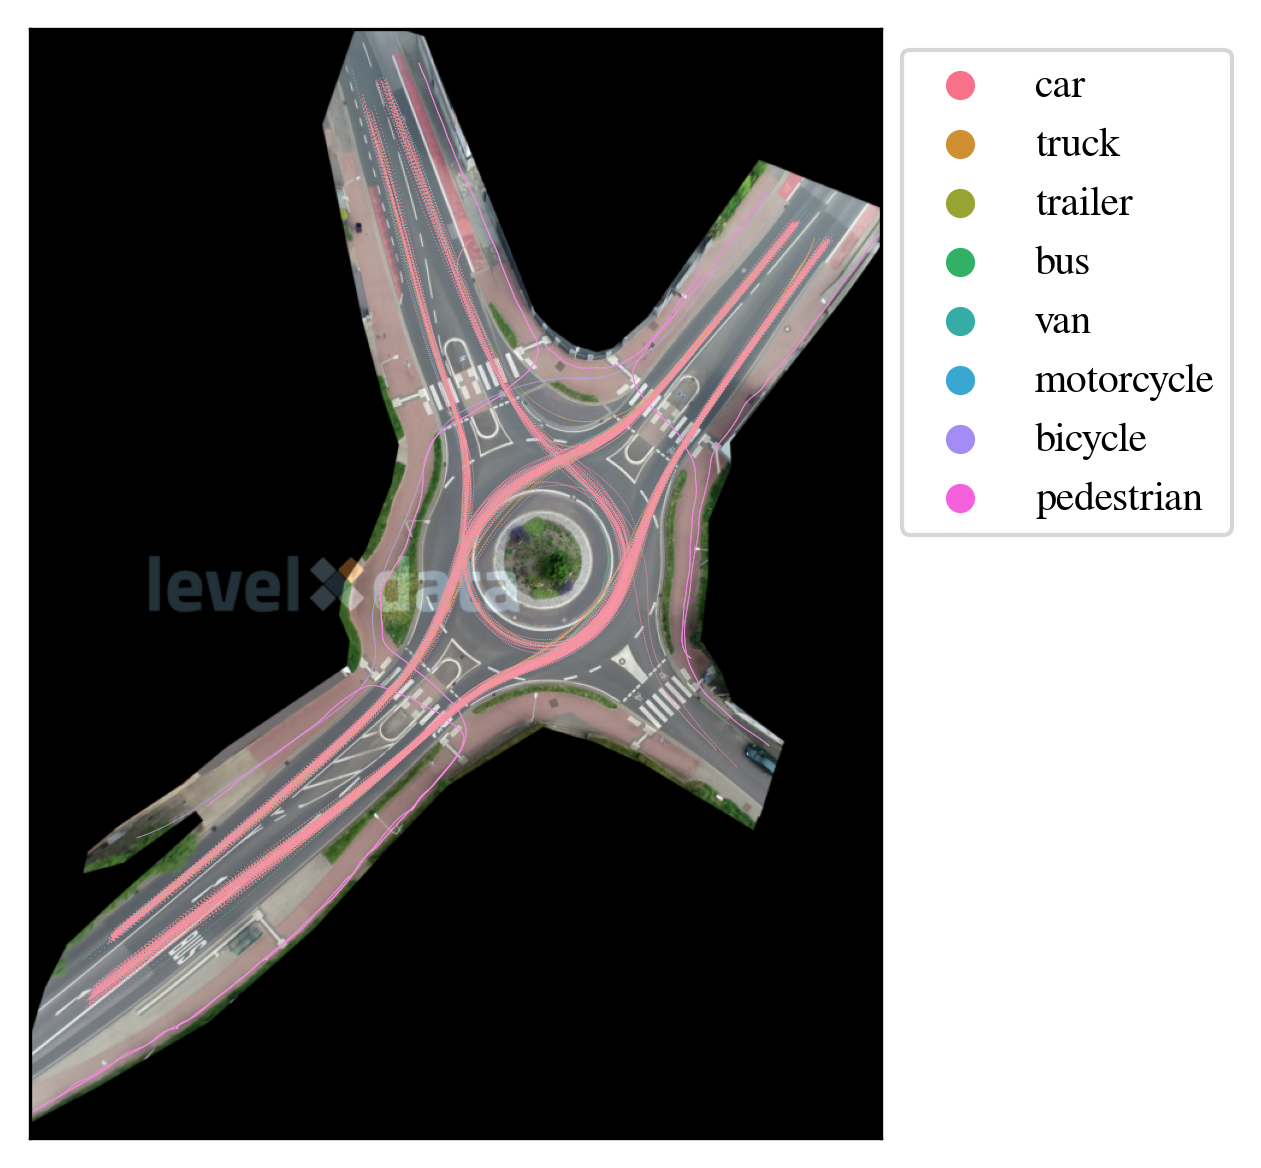

In [4]:
transform2 = mtransforms.Affine2D().scale(0.14).translate(-4.0, -129)
levelx.plot_map_and_trajectories(
    "rounD_2", data_path, img_path, transform2, trajectory_types, configs
)

## Proportion of Trajectory Types

In rounD_0, the distribution of trajectory types exhibits minor variations within the trajectory files. The proportion of `car` is floating around 85%.

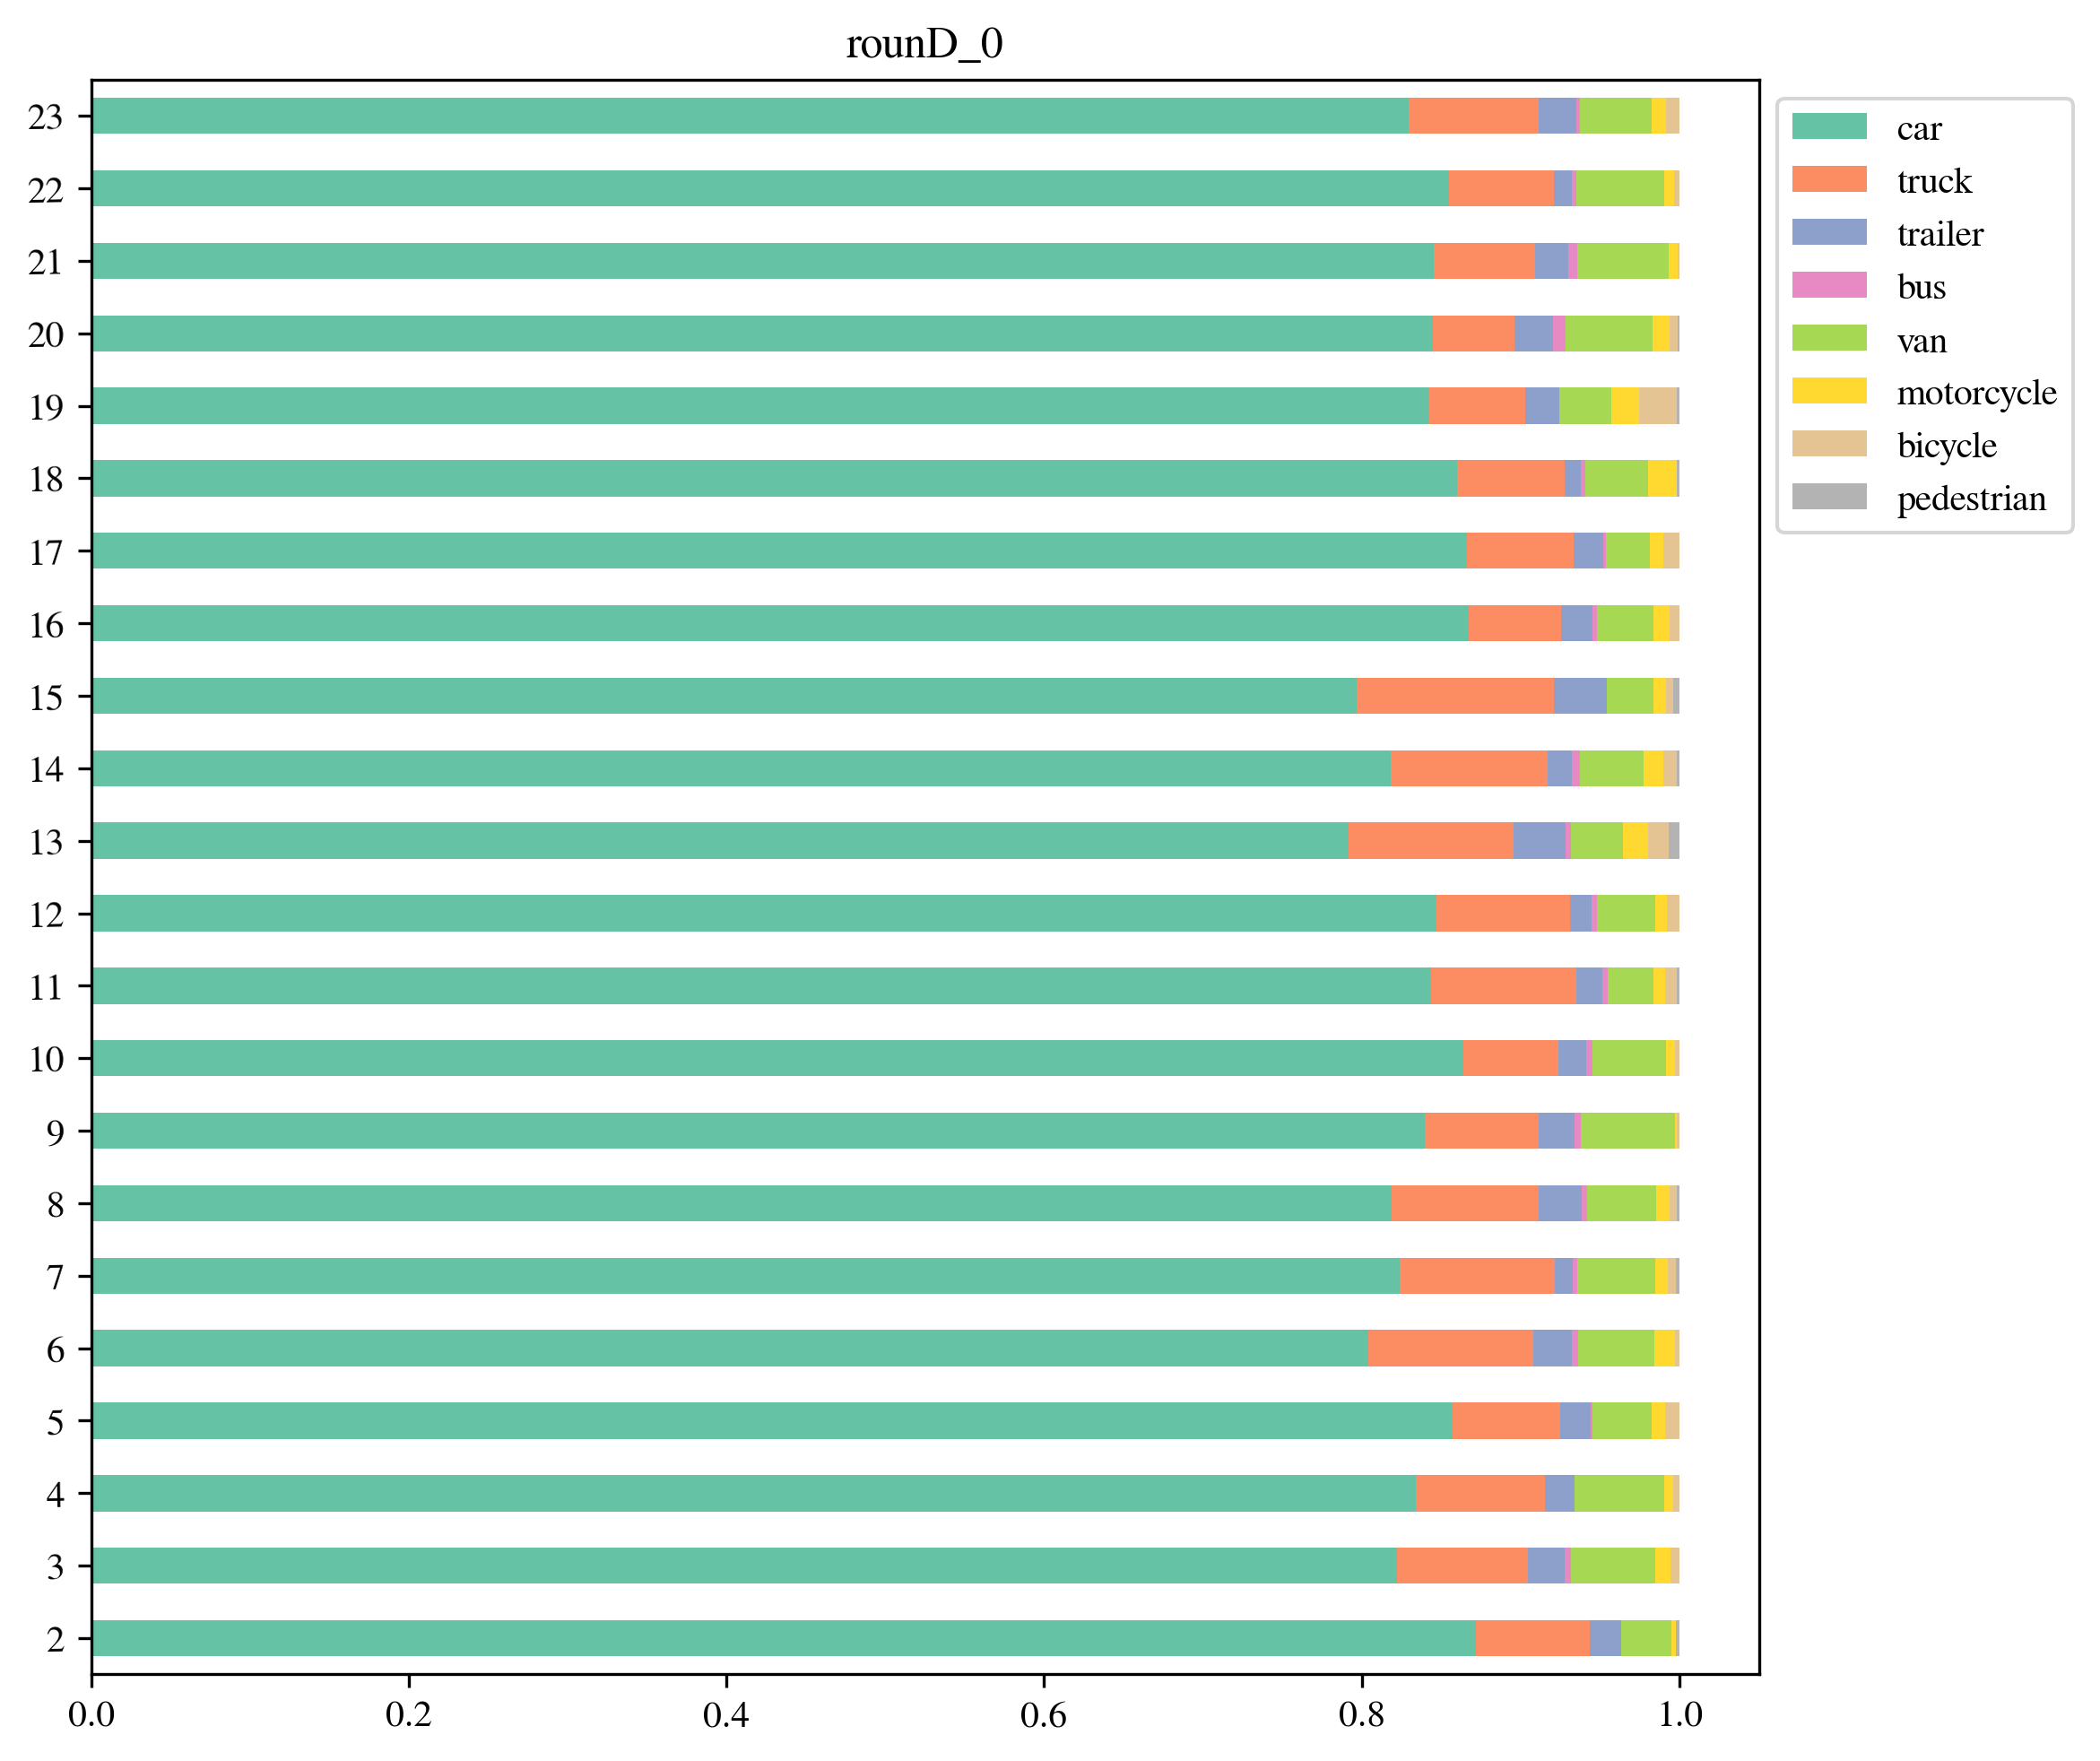

In [5]:
levelx.plot_class_proportion("rounD_0", data_path, trajectory_types, configs)

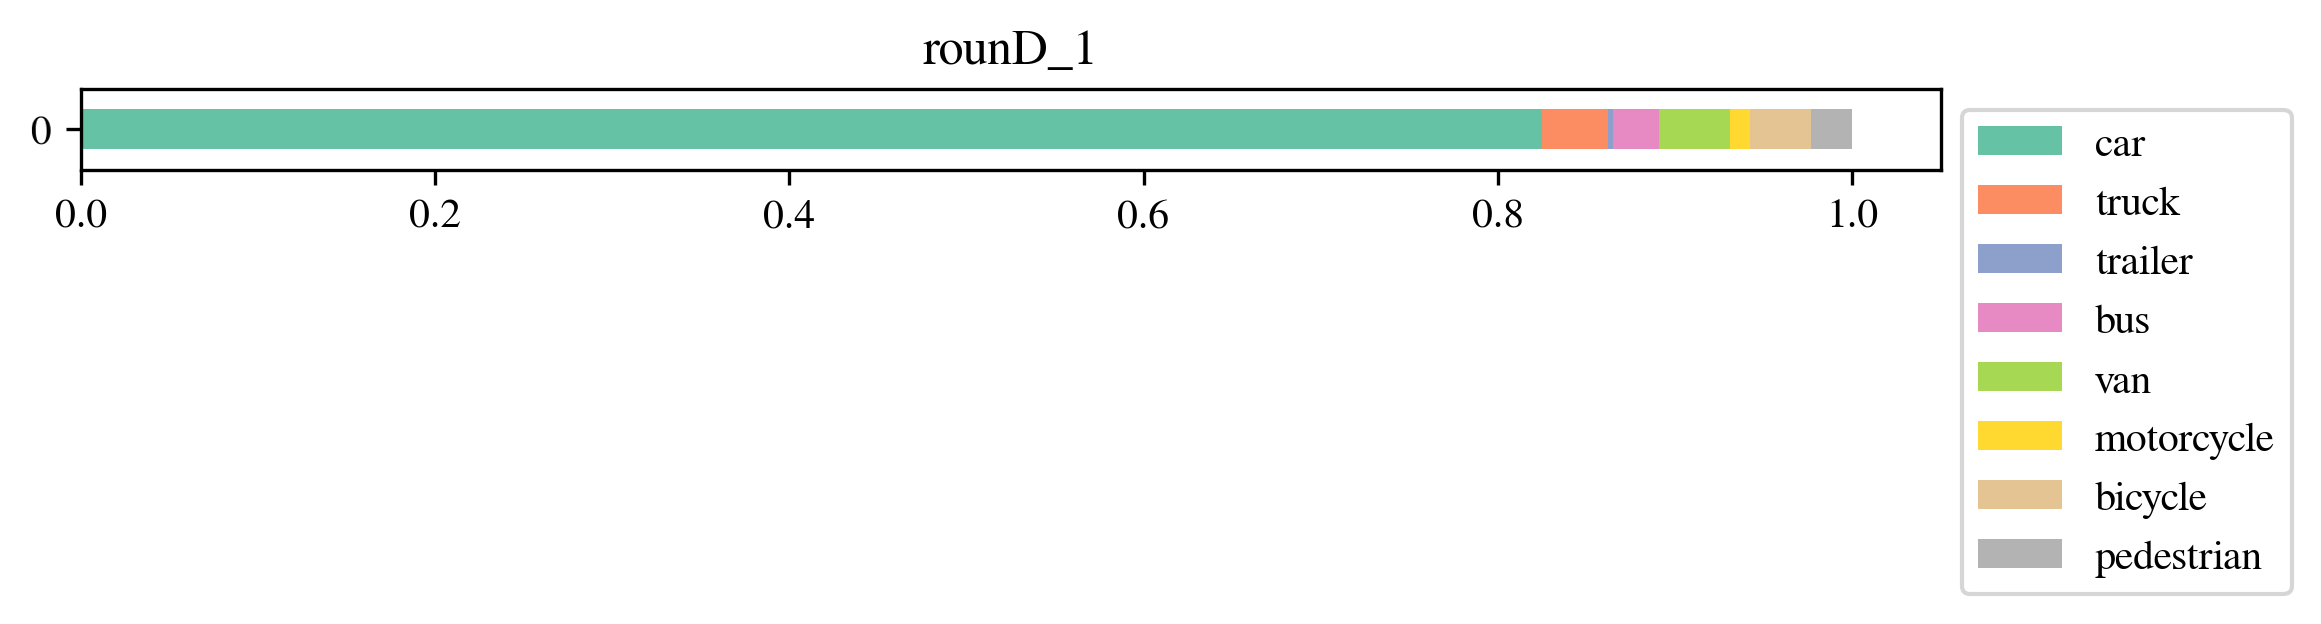

In [6]:
levelx.plot_class_proportion("rounD_1", data_path, trajectory_types, configs)

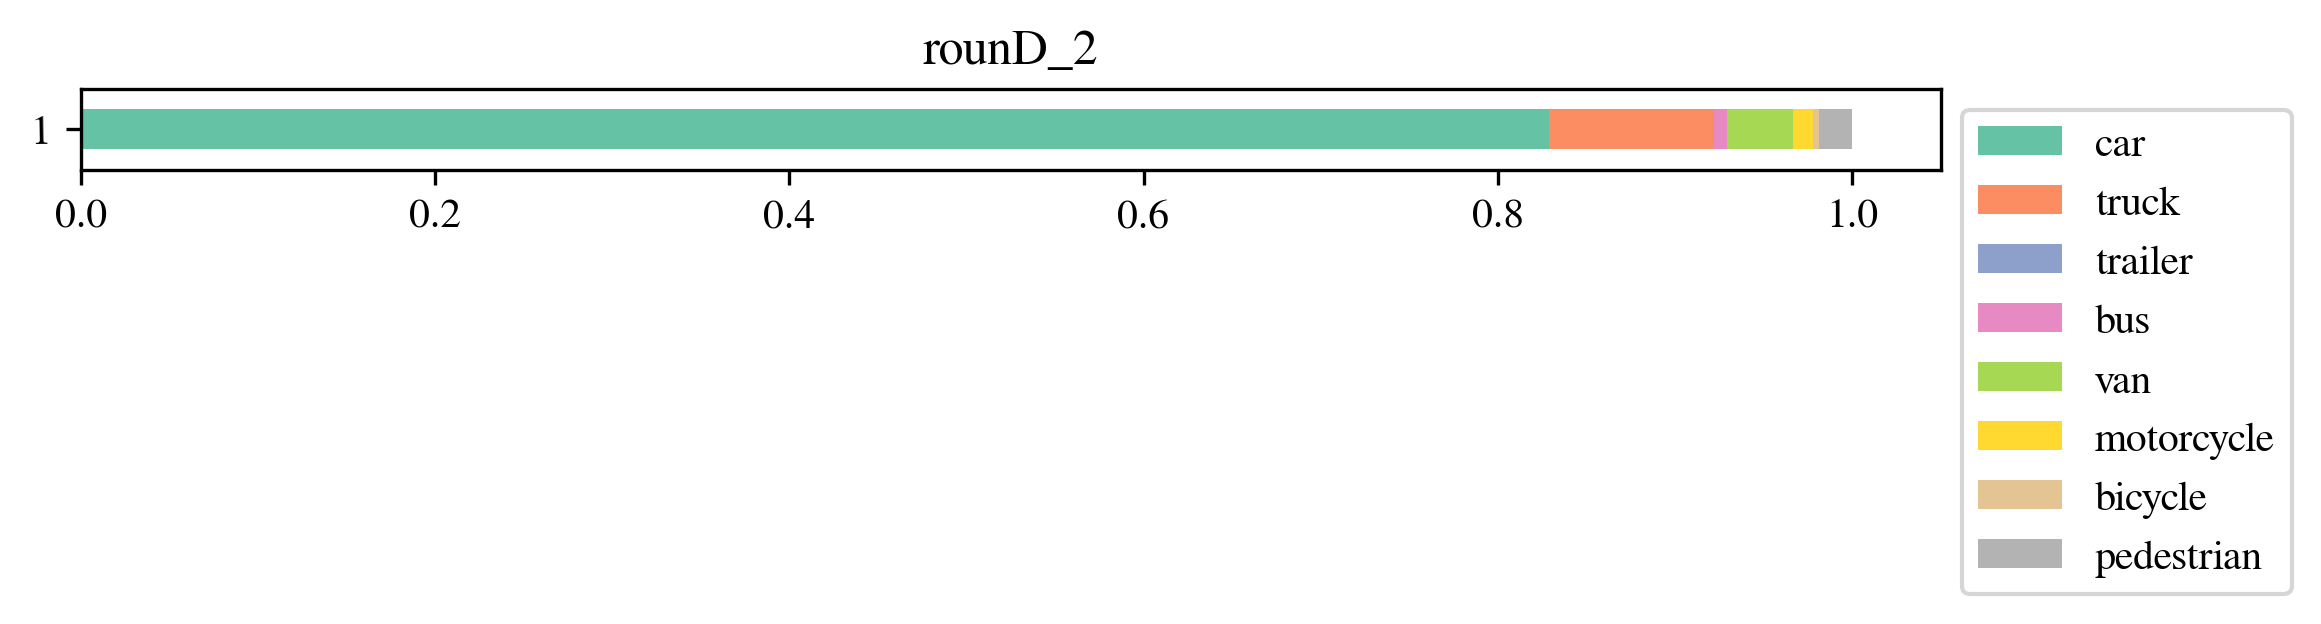

In [7]:
levelx.plot_class_proportion("rounD_2", data_path, trajectory_types, configs)

## Speed Distribution

The mean speed distributions for pedestrians and bicycles exhibit clear distinctions, whereas those of the vehicles appear relatively similar. Furthermore, as vehicles approach the roundabout, a general trend of deceleration becomes noticeable.

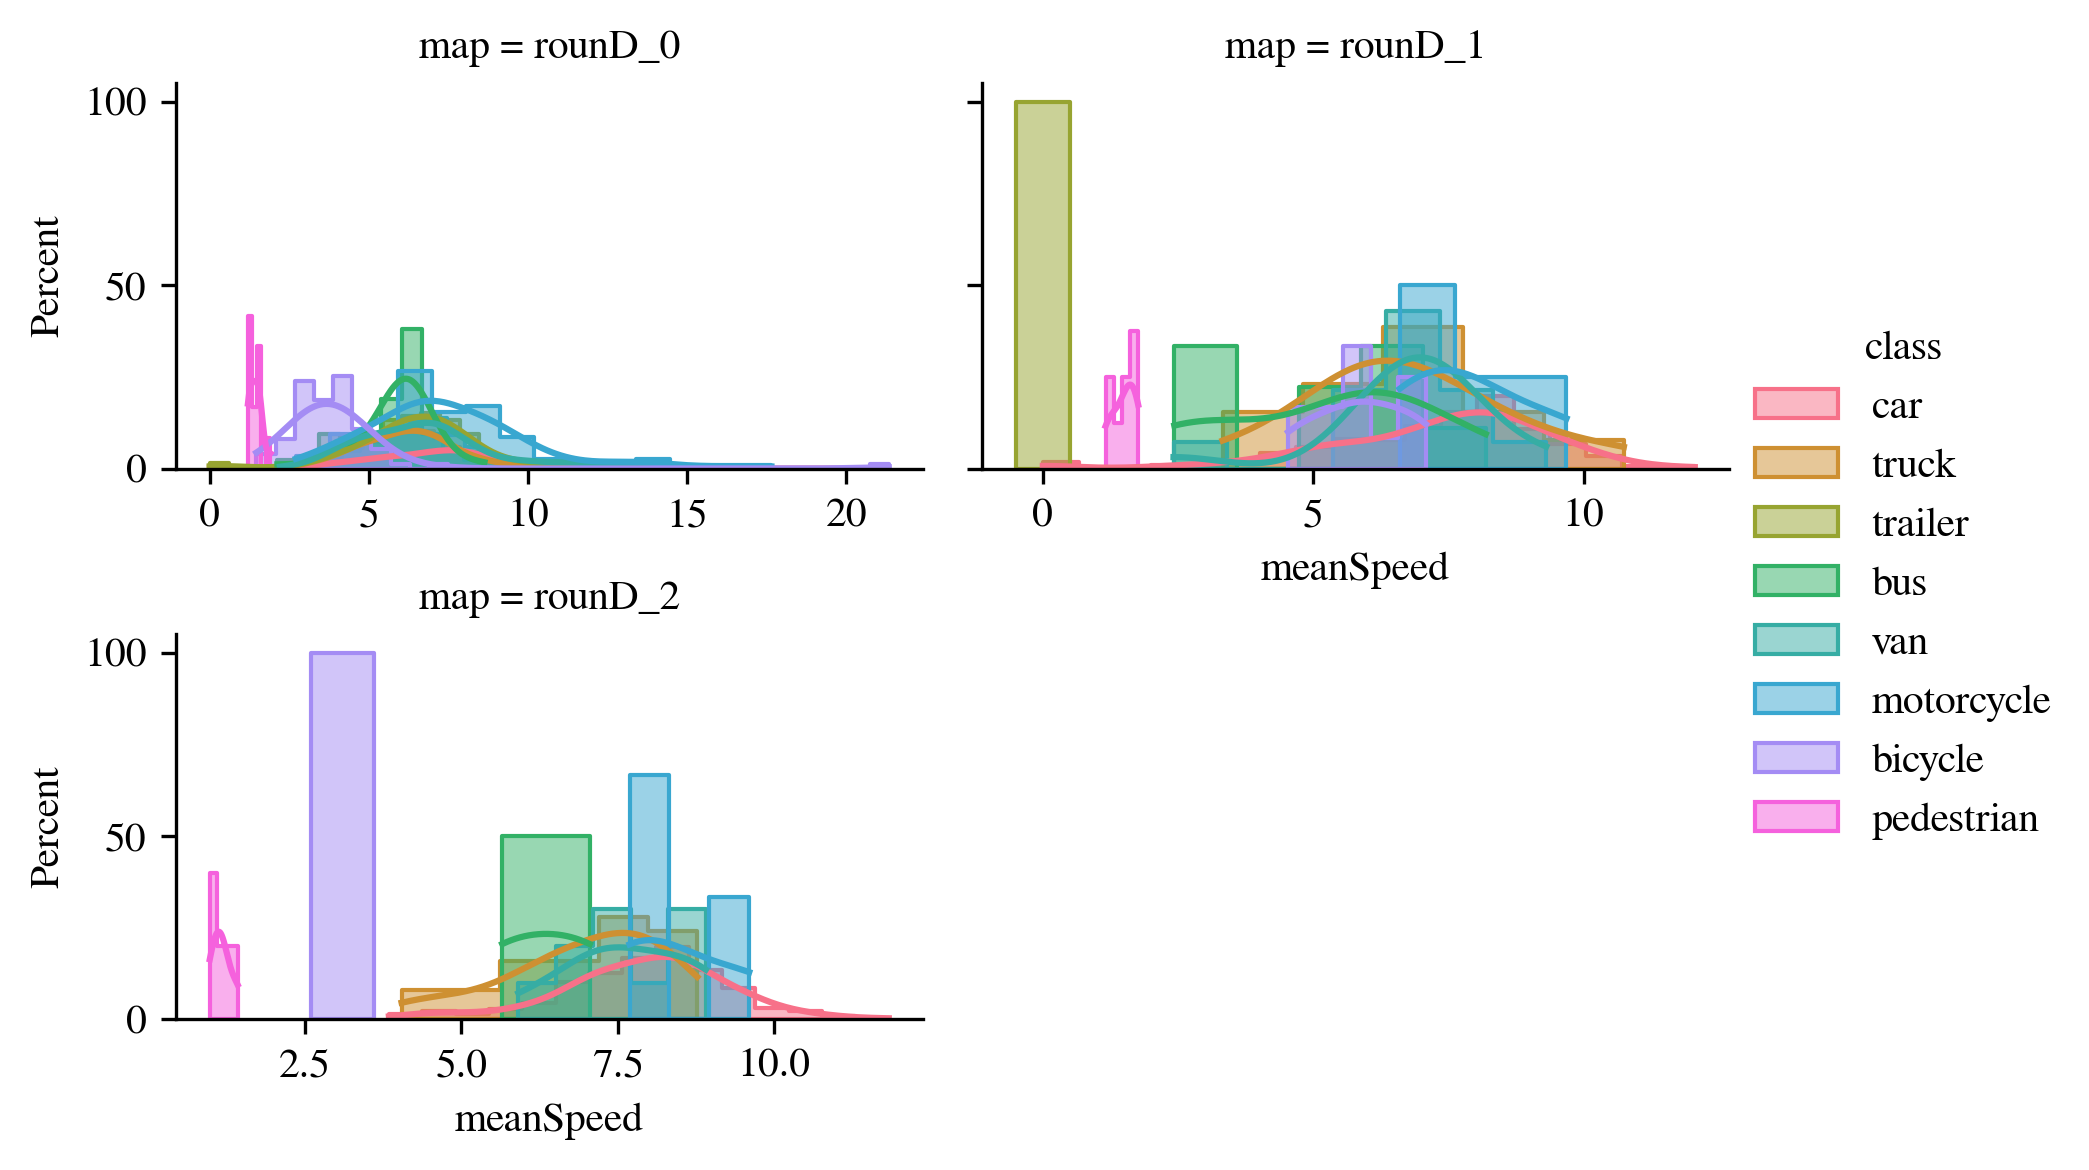

In [8]:
levelx.plot_mean_speed_distribution("rounD", data_path, trajectory_types, configs)

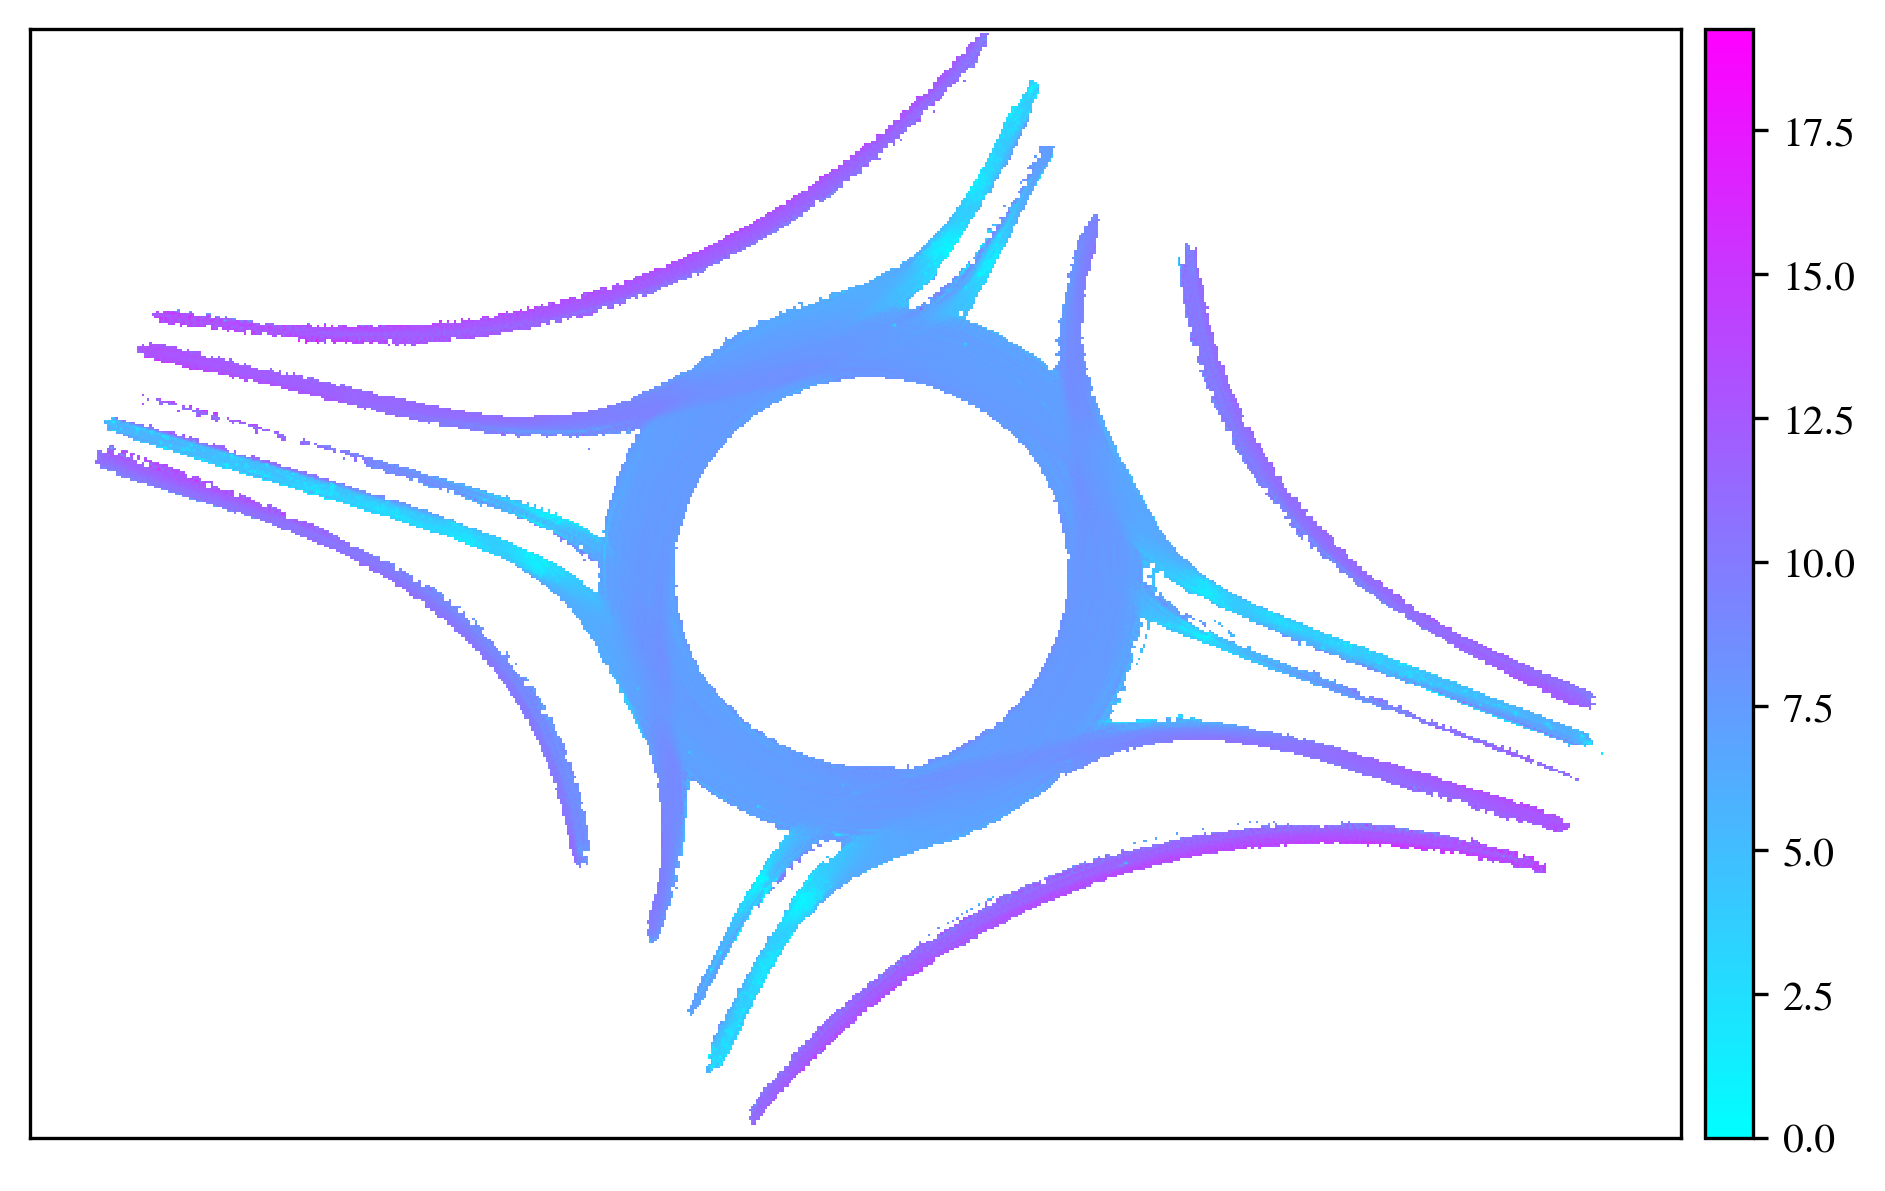

In [9]:
levelx.plot_speed_distribution("rounD_0", [10, 150, -95, -1], data_path, "car", configs)

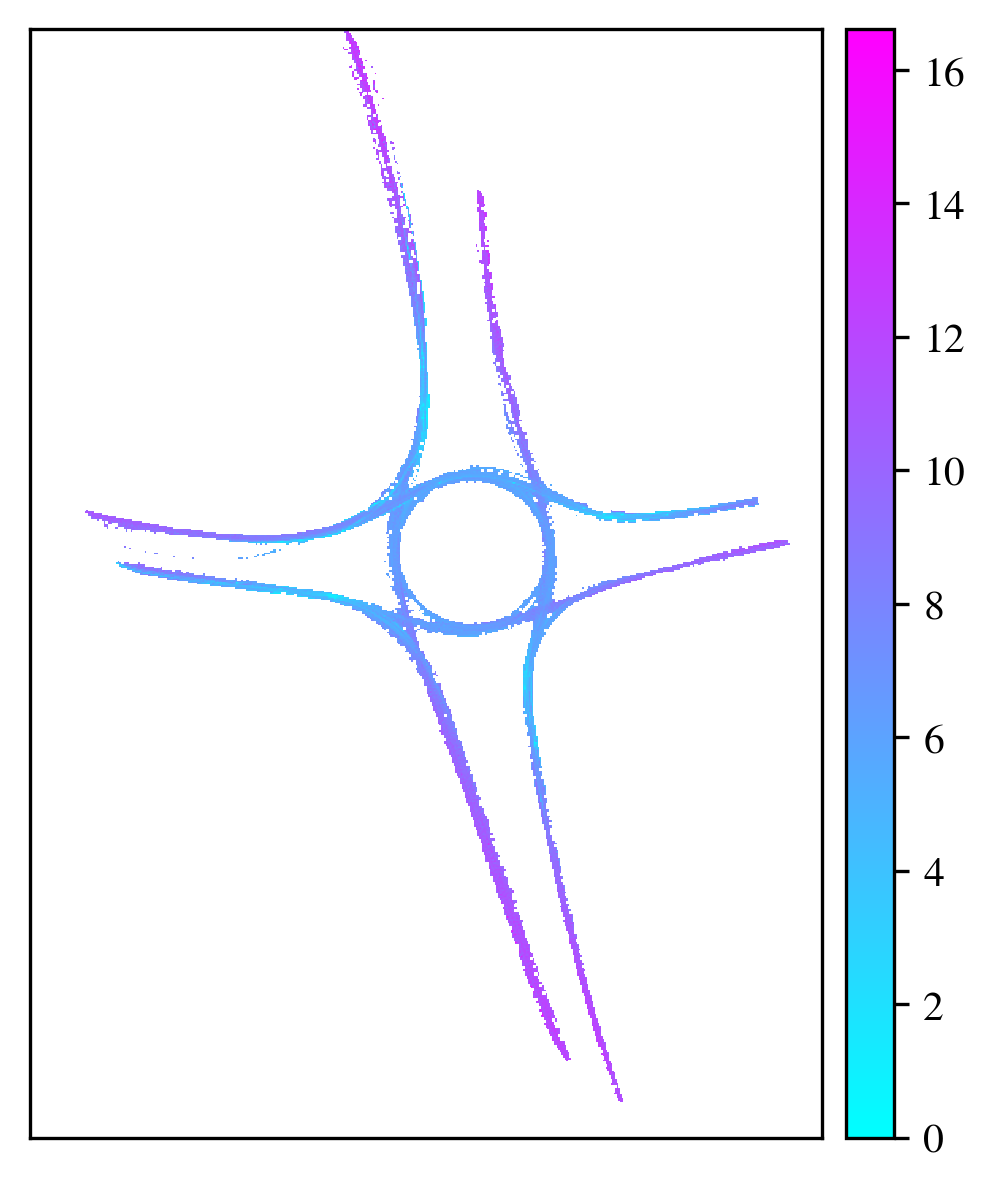

In [10]:
levelx.plot_speed_distribution("rounD_1", [60, 160, -145, -5], data_path, "car", configs)

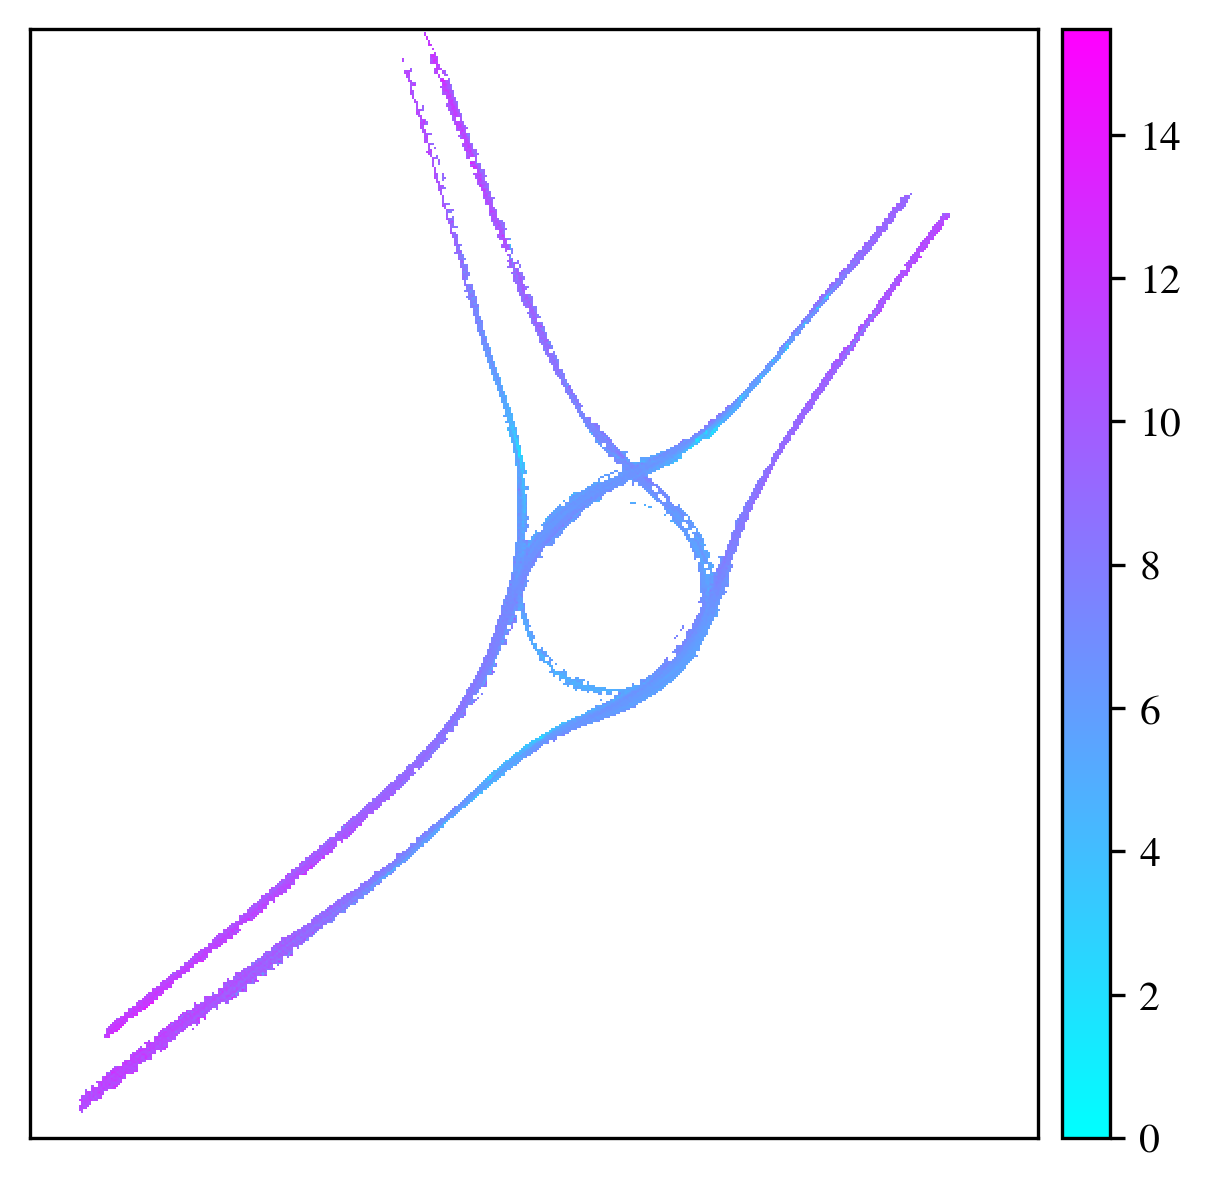

In [11]:
levelx.plot_speed_distribution("rounD_2", [80, 180, -115, -5], data_path, "car", configs)

## Angle Distribution

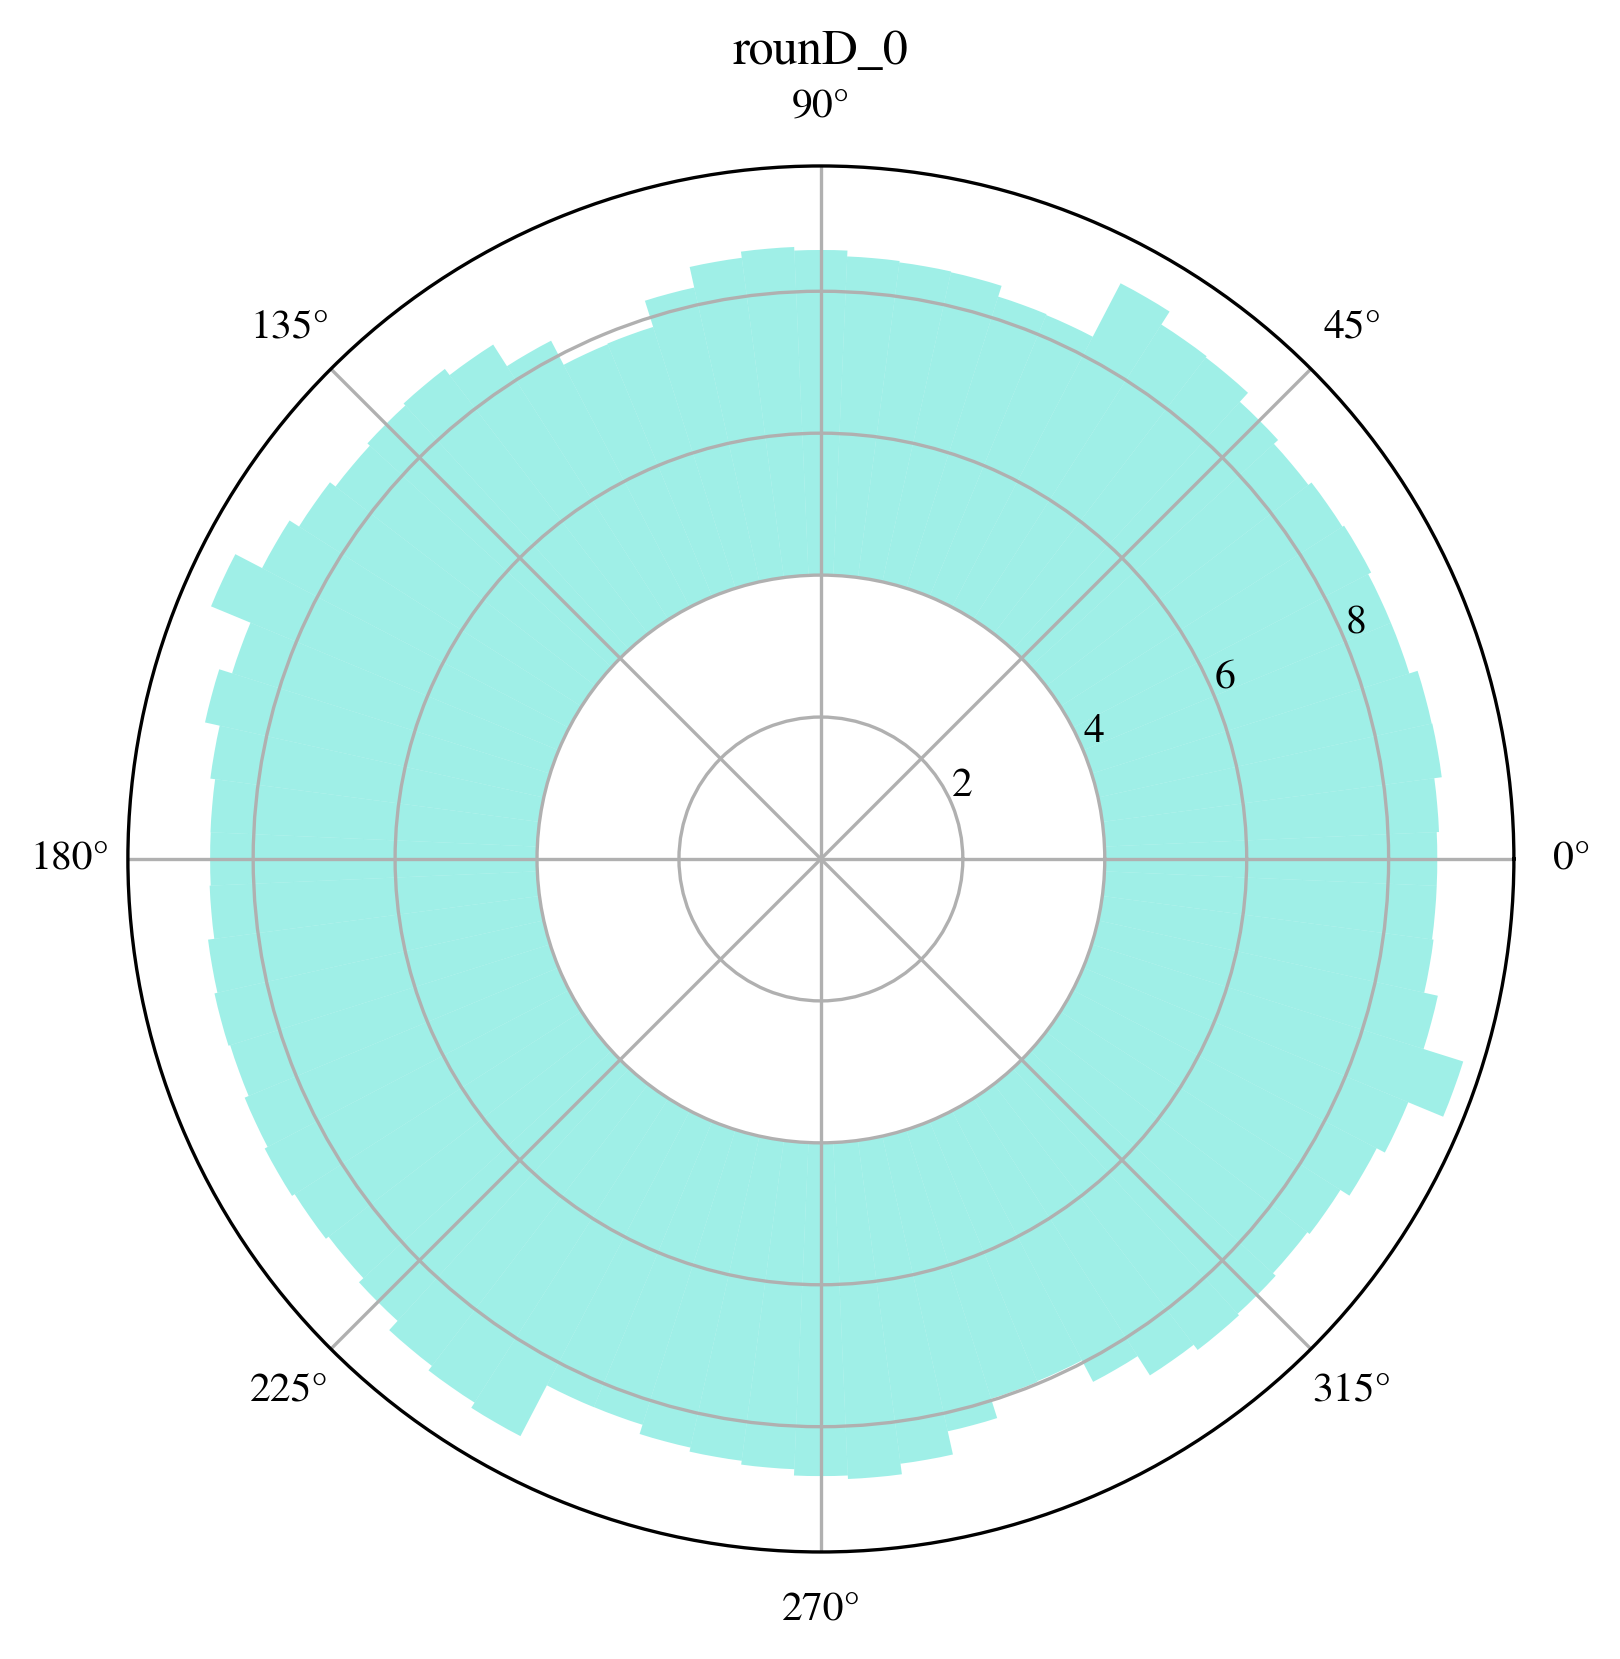

In [12]:
levelx.plot_log_angle_distribution("rounD_0", data_path, "car", configs)

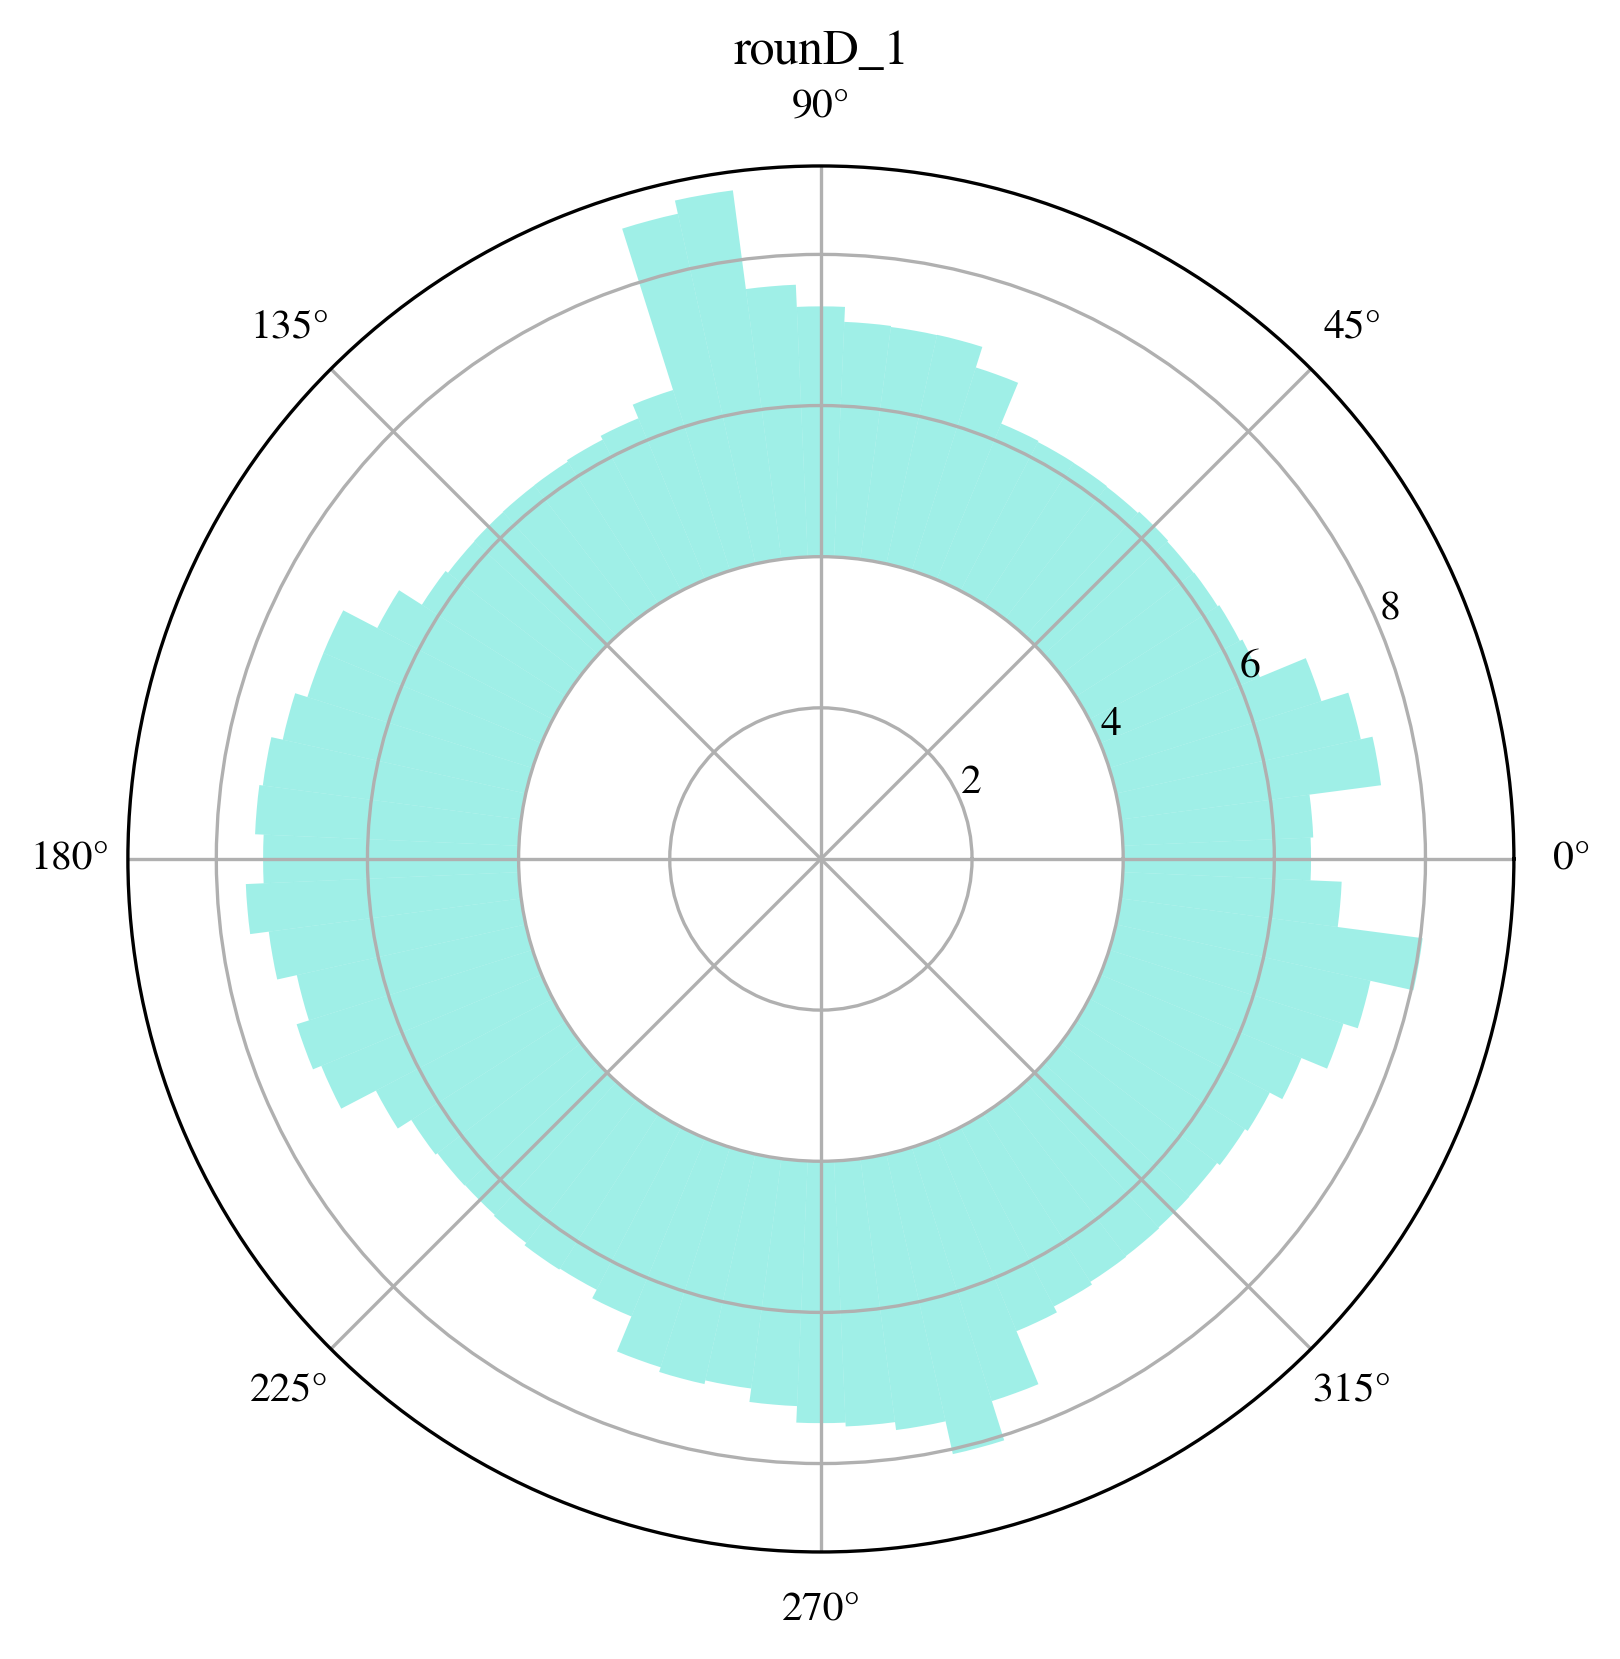

In [13]:
levelx.plot_log_angle_distribution("rounD_1", data_path, "car", configs)

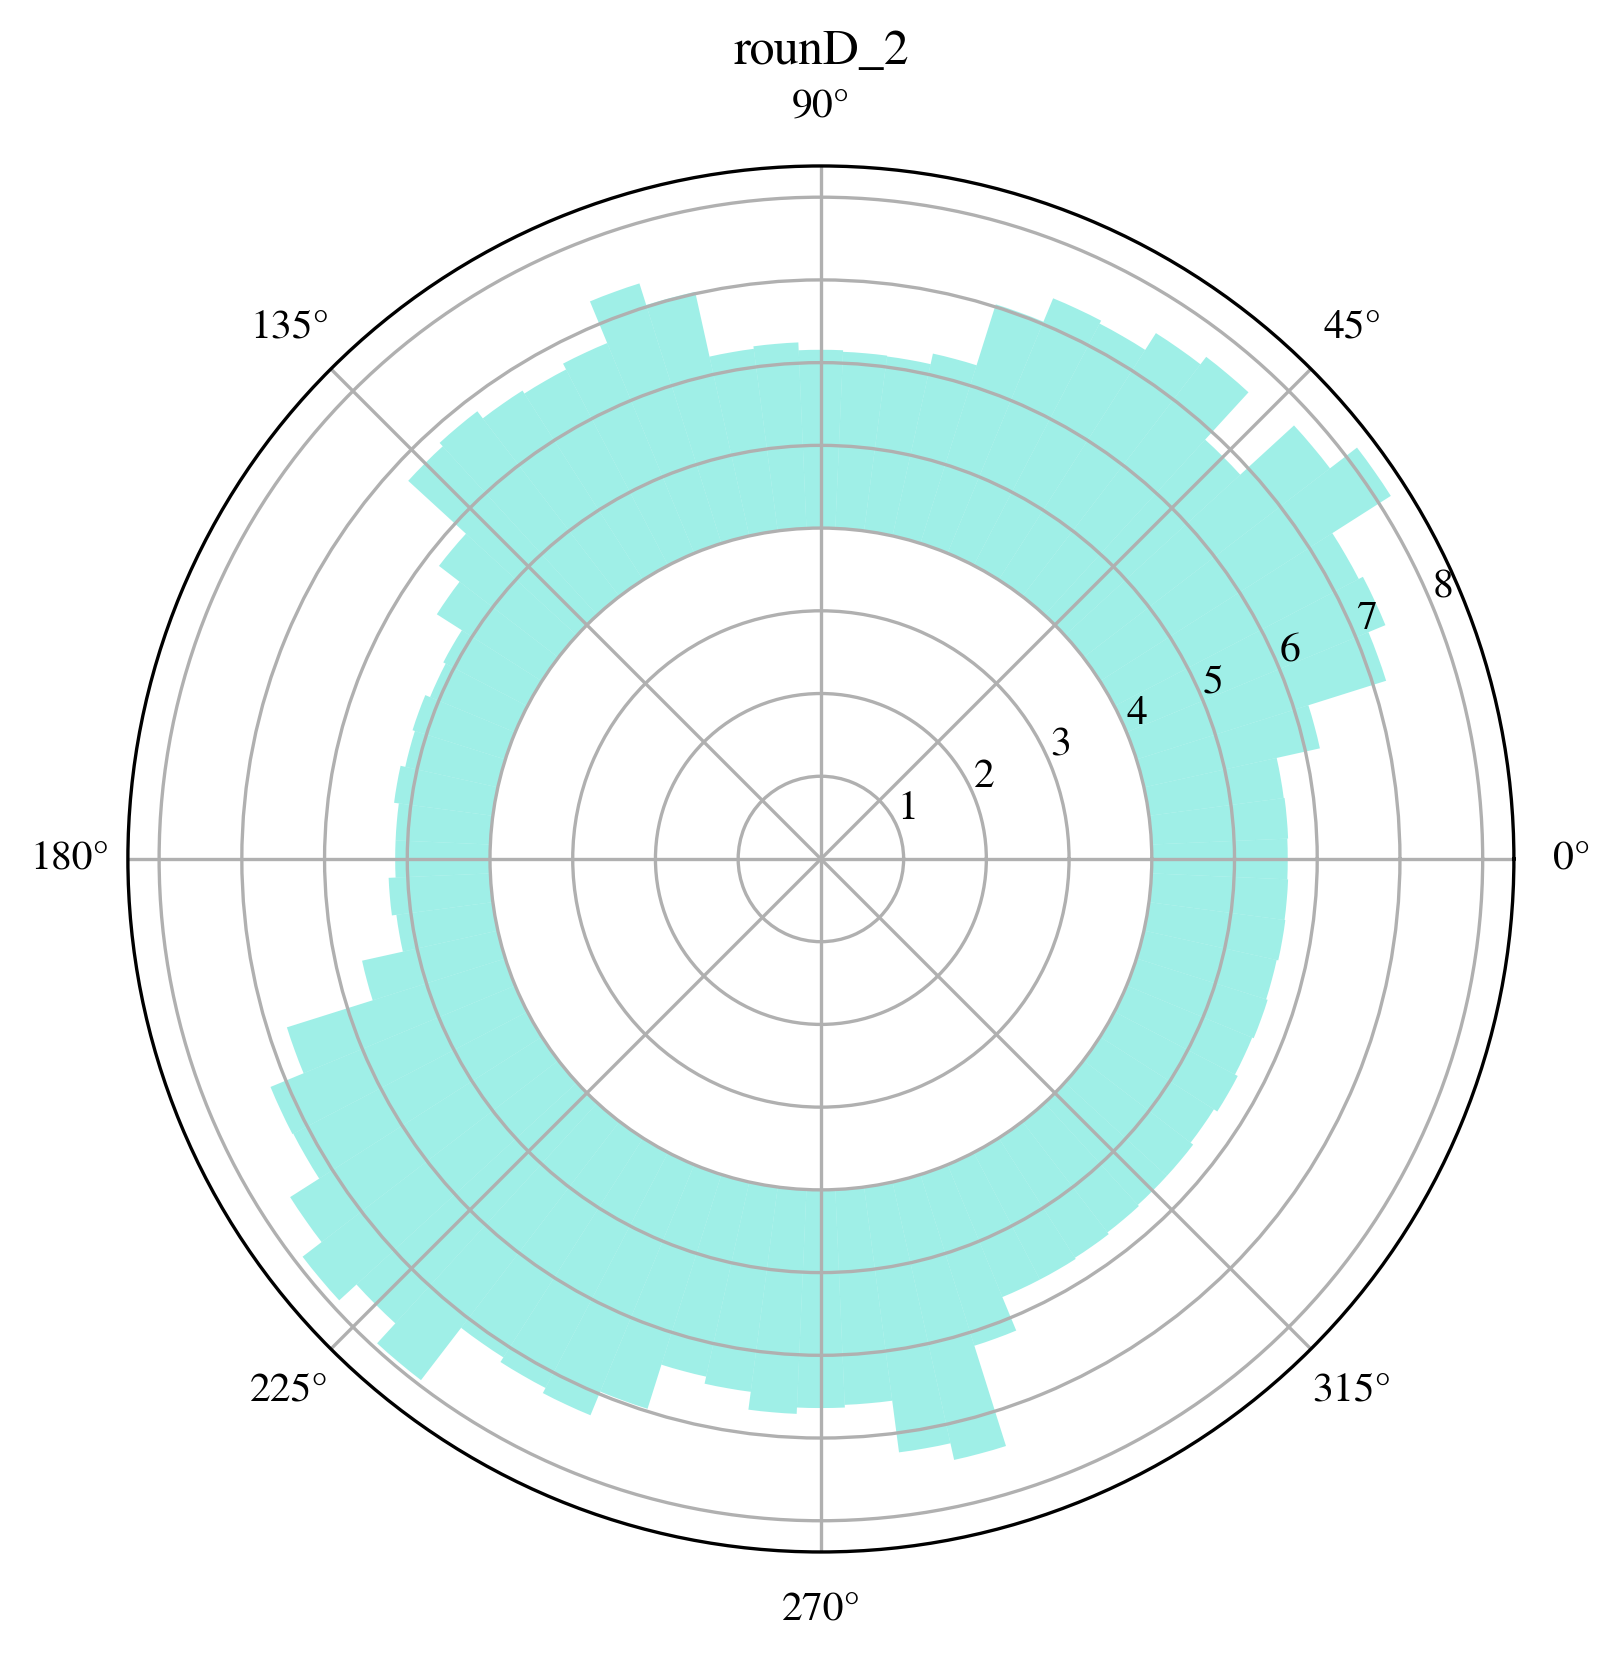

In [14]:
levelx.plot_log_angle_distribution("rounD_2", data_path, "car", configs)

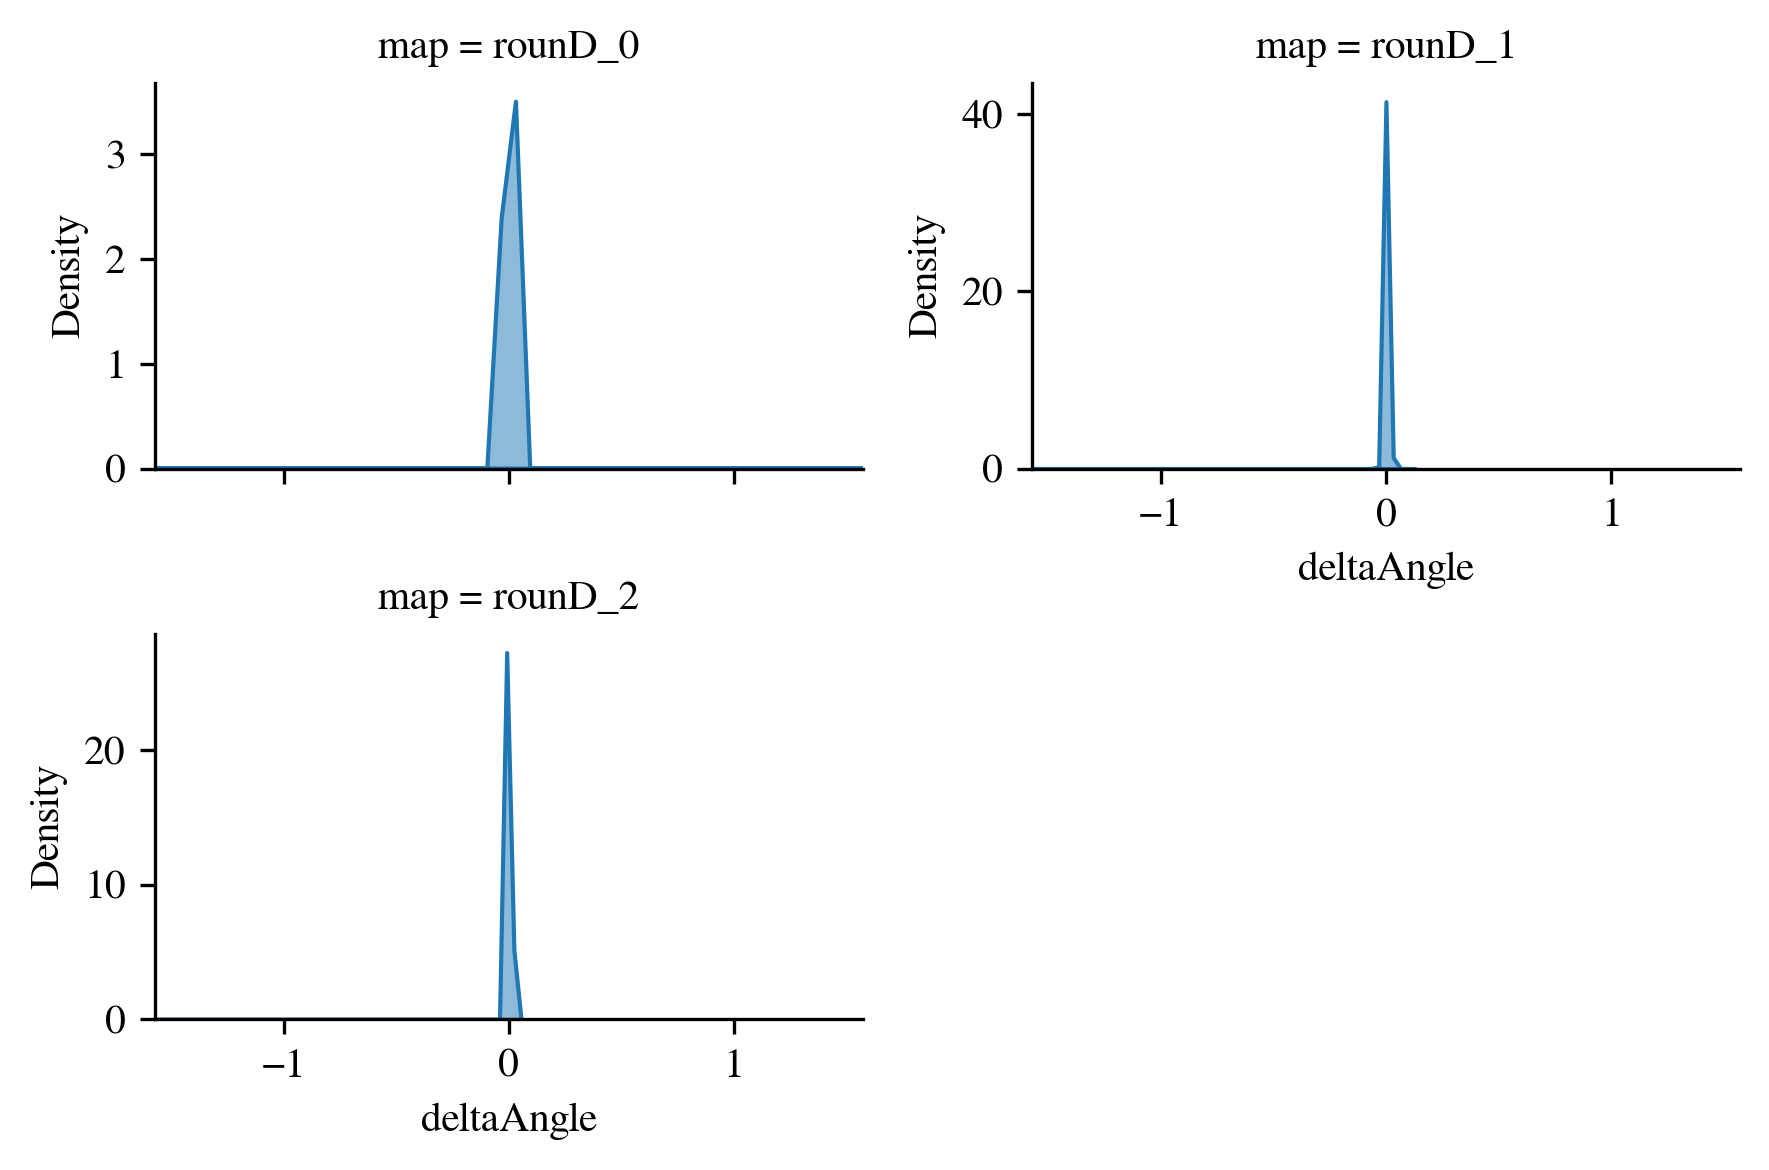

In [15]:
levelx.plot_delta_angle_distribution("rounD", data_path, "car", configs)